# 数据表示
我们使用数据训练模型，例如，某城市房屋信息与价格如下：  

|  面积   |  楼层   | $\dots$ | 价格（万元） |
| :-----: | :-----: | :-----: | :----------: |
|   95    |    6    | $\dots$ |     125      |
|   80    |    3    | $\dots$ |     102      |
| $\dots$ | $\dots$ | $\dots$ |   $\dots$    |
|   125    |    10    | $\dots$ |     158      |

每条历史数据（每一行），我们称为一个**样本**，每个属性（每一列），我们称为**特征**。每条数据对应的目标输出值，我们称为**标签**。

习惯上，我们使用如下的方式进行表示：  
<font size=5>  
$\begin{bmatrix}
x_1^{(1)}, x_2^{(1)}, x_3^{(1)}, \dots, x_n^{(1)}, y^{(1)} \\ 
x_1^{(2)}, x_2^{(2)}, x_3^{(2)}, \dots, x_n^{(2)}, y^{(2)} \\ 
\dots \\ 
x_1^{(m)}, x_2^{(m)}, x_3^{(m)}, \dots, x_n^{(m)}, y^{(m)}
\end{bmatrix}
$
</font>

|      符号       | 含义                           |
| :-------------: | :----------------------------- |
|       $x$       | 特征。                         |
|       $y$       | 标签，即目标输出值（真实值）。 |
|    $\hat{y}$    | 模型的预测值。                 |
|      $x_j$      | 第$j$个特征。                  |
|   $x_j^{(i)}$   | 第$i$个样本中的第$j$个特征。   |
|    $y^{(i)}$    | 第$i$个样本的真实值。          |
| $\hat{y}^{(i)}$ | 第$i$个样本的预测值。          |

# 回归分析
**回归分析**是用来评估变量之间关系的统计过程。用来解释自变量$X$与因变量$Y$的关系。即当自变量$X$发生改变时，因变量$Y$会如何发生改变。

## 线性回归
线性回归，是回归分析的一种，评估自变量$X$与因变量$Y$之间是一种线性关系。线性回归可以分为两种：
* 简单线性回归：具有一个自变量。
* 多元线性回归：具有多个自变量。
  
线性关系的理解：  
* 画出来的图像是直的。
* 每个自变量的最高次项为1。

![图像无法显示](../imgs/exercise.png)
以下方程中，$y$与$x$哪个是线性关系？  
A $y = e^x + 8x$  
B $y = x ^ 2 - 6x + 3$  
C $y = 8x - 2$  
D $y = sinx$
![图像无法显示](../imgs/split_line.png)

## 拟合
**拟合**，是指构建一种算法（数学函数），使得该算法的计算结果能够与真实数据相吻合。从机器学习角度讲，线性回归就是要构建一个线性函数，使得该函数与目标值之间的相符性最好。从空间的角度来看，就是要让函数的直线（面），尽可能靠近空间中所有的数据点（点到直线的平行于$y$轴的距离之和最短）。线性回归会输出一个连续值。  

![图像无法显示](../imgs/linear.png "线性回归")

![图形无法显示](../imgs/summary.png "小结")

# 简单线性回归
## 模型说明
当线性回归中，仅有一个自变量时，我们称为**简单线性回归**。

这里，我们以房屋面积（$x$）与房屋价格（$y$）为例，显而易见，二者是一种线性关系，房屋价格正比于房屋面积，我们假设比例为$w$：  
<font size=5>  
$\hat{y} = w * x$  
</font>

* $\hat{y}$：预测值。
* $w$：权重。

然而，这种线性方程一定是过原点的，即当$x$为0时，$y$也一定为0。这可能并不符合现实中某些场景。为了能够让方程具有更广泛的适应性，我们这里再增加一个截距，设为$w_0$，即之前的方程变为：  
<font size=5>  
$\hat{y} = w_0 + w_1 * x$  
</font>

* $w_0$：截距（偏置），即bias（$b$）。
* 这里为了统一使用$w$参数，使用$w_0$表示$b$。

而以上方程，就是简单线性回归的模型。方程中的$w$（$w_0$与$w_1$），就是模型的参数。

## 损失函数
通过之前的介绍，我们得知，对机器学习来讲，就是从已知数据（经验）去建立一个模型，使得该模型能够对未知的数据进行预测。实际上，机器学习的过程，就是确定（学习）模型参数（即模型的权重与偏置）的过程，因为只要模型的参数确定了，我们就可以利用模型进行预测（参数模型）。

那么，模型的参数该如何求解呢？对于监督学习来说，我们可以通过建立损失函数来实现。**损失函数**，简单的说，就是关于误差的一个函数。损失函数用来衡量模型预测值与真实值之间的差异。机器学习的目标，就是要建立一个损失函数，使得该函数的值最小。

也就是说，损失函数是一个关于模型参数的函数（以模型参数$w$作为自变量的函数），自变量可能的取值组合通常是无限的，我们的目标，就是要在众多可能的组合中，找到一组最合适的自变量组合（值），使得损失函数的值最小。

损失函数我们习惯使用$J$来表示，例如，$J(w)$则表示以$w$为自变量的函数。

In [2]:
import numpy as np
import pandas as pd
# 机器学习库，提供很多有用的机器学习算法。
from sklearn.linear_model import LinearRegression

x = np.arange(0, 100, 0.1)
y = 5 * x - 4
# 将x转换为二维数据，以便在sklearn中使用。
x = x.reshape(len(x), 1)
# 创建线性回归类的对象。
lr = LinearRegression()
# 拟合。根据现有的数据集，建立模型。找出x与y之间的关系（方程式或函数）。
# 注意，fit方法要求的x，必须是二维的x。
lr.fit(x, y)
# 输出权重w1。
print(lr.coef_)
# 输出偏置（截距）w0
print(lr.intercept_)

[5.]
-3.9999999999999716


改变数据，让数据不那么完美，即x与y之间不是严格的函数映射关系。

In [4]:
# 生成一个正态分布的干扰项（噪声）。
noise = np.random.normal(0, 1.2, len(x))
x = np.arange(0, 100, 0.1)
y = 5 * x - 4 + noise
x = x.reshape(len(x), 1)
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[4.9992736]
-3.9221928341671912


当拟合之后，回归方程就确定了，就可以对未知的x实现预测任务。

In [6]:
# 自己预测。
unknown_x = 101
w0 = lr.intercept_
w1 = lr.coef_[0]
y_hat = w0 + w1 * unknown_x
print(y_hat)

501.0044404310869


In [8]:
# 使用模型预测。
# 根据给定的x数据，返回预测结果。要求：x必须是二维数据。
y_hat = lr.predict([[unknown_x]])
print(y_hat[0])

501.0044404310869


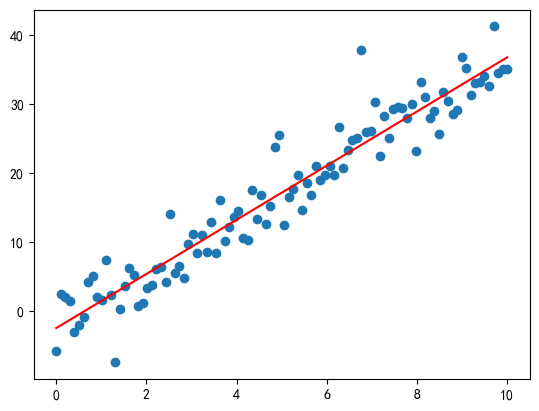

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# 在指定区间之内，生成等差数列。
x = np.linspace(0, 10, 100)
# 标准差越大，数据越分散。
y = 4 * x - 3 + np.random.normal(0, 3.5, len(x))
plt.scatter(x, y)
lr = LinearRegression()
lr.fit(np.reshape(x, (len(x), 1)), y)
w0 = lr.intercept_
w1 = lr.coef_[0]
y_hat = w1 * x + w0
y_hat = lr.predict(np.reshape(x, (len(x), 1)))
plt.plot(x, y_hat, c="r")

# 切分数据集
我们的目的，不应该只是让模型在现有的数据中表现优秀，更重要的是，模型也应该能够适用于未知的数据，即模型在未知数据中，同样能够具有不错的预测能力，我们将这种行为称为模型的泛化能力。

为了能够验证模型的泛化能力，我们需要将现有的数据集分成两个部分：
* 训练集：用于训练模型，求解出最佳参数值（参数估计）。
* 测试集：用于验证模型的泛化能力。

In [5]:
from sklearn.model_selection import train_test_split


x = np.linspace(0, 10, 10)
y = y = 4 * x - 3 + np.random.normal(0, 3.5, len(x))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
# reshape可以指定-1，表示根据其他维度的长度，自动计算当前的维度。
lr.fit(x_train.reshape(-1, 1), y_train)
y_hat = lr.predict(x_test.reshape(-1, 1))

[array([1.11111111, 8.88888889, 2.22222222, 6.66666667, 0.        ,
        5.55555556, 7.77777778]),
 array([10.        ,  4.44444444,  3.33333333]),
 array([ 1.46871949, 40.85451709,  6.7315608 , 23.26522487, -2.59797346,
        21.1717955 , 26.83886971]),
 array([31.2557075 , 13.0071911 , 11.07077333])]

In [13]:
# shuffle：用来指定是否进行洗牌操作，默认值为True。
# random_state：随机种子。用来控制随机行为。随机种子相同，洗牌的时候，顺序就相同。
train_test_split([1, 2, 3, 4, 5], test_size=0.2, random_state=1)

[[2, 5, 1, 4], [3]]

# 练习
* 根据家庭电流数据集，使用全局有用功率（x）与全局电流（y）建立简单线性回归。
    + global_active_power：全局有用功率。
    + Global_intensity：全局电流。
    + 注意：数据中存在缺失值（?表示缺失）。